**THIS IS NOT FINANCIAL ADVICE. DO YOUR OWN RESEARCH. USE AT YOUR OWN RISK.**

In [10]:
# For more information on this notebook, see my blog posts:
# https://medium.com/wwblog/technical-analysis-of-investment-prices-with-python-fe44fcdbceea
# https://medium.com/wwblog/using-papermill-to-auto-generate-technical-analyses-for-investments-19900e518f9e
# https://medium.com/wwblog/create-a-stochastic-oscillator-in-python-a7da42473677

import pandas as pd
import pandas_ta as ta
import yfinance as yf
import requests_cache
import matplotlib.pyplot as plt
import mplfinance as mpf

from IPython.display import display, Markdown, Latex
from matplotlib.lines import Line2D

# In the blog post, I included the various prep and plot functions directly in the notebook itself.
# But I'm moved these to external scripts to avoid cluttering up the technical analysis with a bunch of code.
## The technical part is in the two below Python files.
%run "prepare_df.py"
%run "plot_df.py"


In [11]:
# Parameters
ticker_symbol = "MSFT"

In [12]:
## Creates a cached session object that is used for HTTP requests sent to the Yahoo Finance API.
session = requests_cache.CachedSession("yfinance.cache")
## Sets a custom User-Agent header to indentify the request origin to the API.
session.headers["User-Agent"] = f"ta-{ticker_symbol}-notebook/1.0"
## Creates a 'Ticker' object from the 'yf' module.
ticker = yf.Ticker(ticker_symbol, session=session)
## Retrieves the short name of the company for the 'ticker' object.
ticker_short_name = ticker.info["shortName"]
## Formats a Markdown string and displays as output using 'display()' function.
display(Markdown(f"# Technical analysis: {ticker_short_name} ({ticker_symbol}), {today_str}"))

# Technical analysis: Microsoft Corporation (MSFT), 2023-04-28

## 1 Load data

In [13]:
# Use unadjusted close prices, since we want to plot capital gains
# (i.e. exclude cash flow yields like dividends).
## Retrieves the historical market data for a particular stock.
## Sets the start date to two year aga and end date to the current date.
## "Without any adjustments" typically refers to not adjusted to reflect any corporate actions.
## E.g., issues a dividend might lead to a drop in stock price, due to dividend payment.
## Historical prices are returned without any adjustments.
hist = ticker.history(start=date_ranges["2Y"], end=today_str, auto_adjust=False, back_adjust=False)
## Prints the first few rows.
hist.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-04-28 00:00:00-04:00,256.079987,256.540009,252.949997,254.559998,250.050171,46903100,0.0,0.0
2021-04-29 00:00:00-04:00,255.460007,256.100006,249.000000,252.509995,248.036499,40589000,0.0,0.0
2021-04-30 00:00:00-04:00,249.740005,253.080002,249.600006,252.179993,247.712357,30945100,0.0,0.0
2021-05-03 00:00:00-04:00,253.399994,254.350006,251.119995,251.860001,247.398010,19626600,0.0,0.0
2021-05-04 00:00:00-04:00,250.970001,251.210007,245.759995,247.789993,243.400101,32756100,0.0,0.0


## 2 Candlestick charts

See [Candlestick definition](https://www.investopedia.com/terms/c/candlestick.asp) for more information.

"<!-- To represent price movements of an asset over time. -->"

<!-- To represent price movements of an asset over time. -->

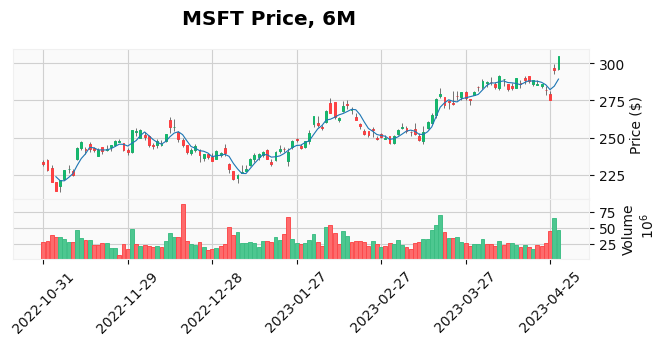

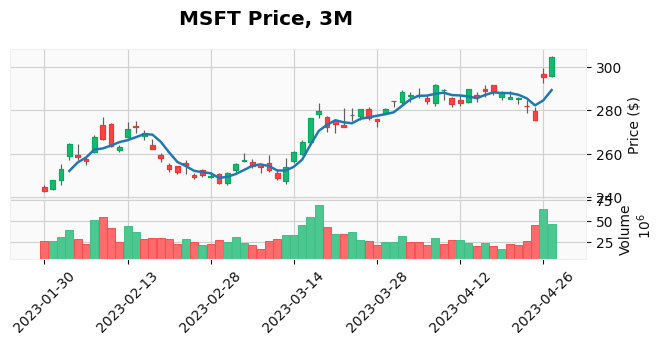

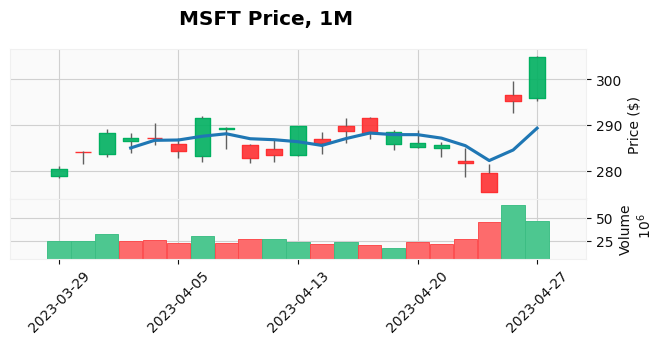

In [14]:
for rng in ["6M", "3M", "1M"]:
    plot_candlestick(hist, ticker_symbol, rng)

## 3 Capital appreciation

See [Capital Appreciation](https://www.investopedia.com/terms/c/capitalappreciation.asp) for more information.

Capital appreciation (i.e., capital gains) do not include cash flow yields (e.g., dividends, bond coupons, mutual fund capital gains distributions).

<!-- To display only the changes in values over time, without any cash flow yields.  -->

<!-- To display only the changes in values over time, without any cash flow yields.  -->

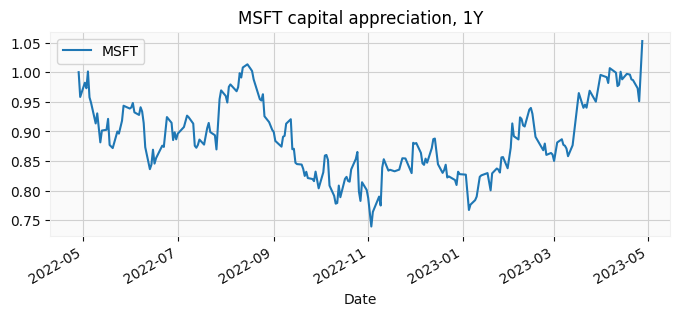

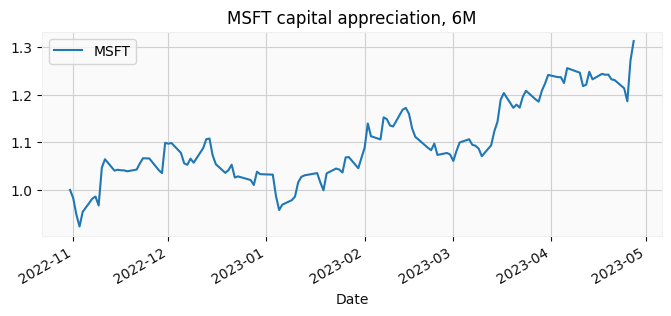

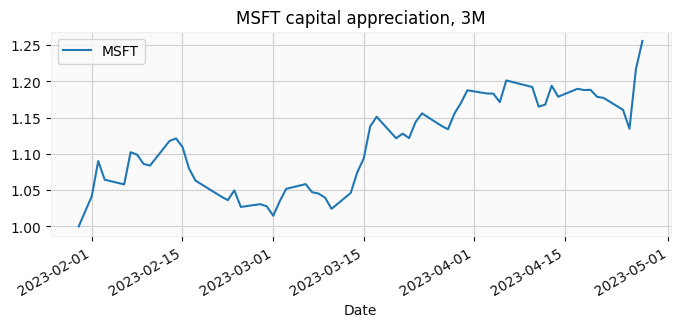

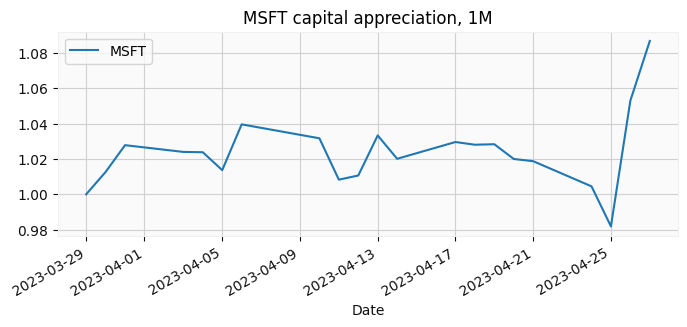

In [15]:
for rng in ["1Y", "6M", "3M", "1M"]:
    plot_capital_appreciation(hist, ticker_symbol, rng)

## 4 Trend indicators

See:

- [Trend Trading](https://www.investopedia.com/terms/t/trendtrading.asp)

<!-- a strategy of identifying and following market trends to profit from the direction in which an asset's price is moving. -->

### 4.1 Simple Moving Average Crossover

See [How to Use a Moving Average to Buy Stocks](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp).

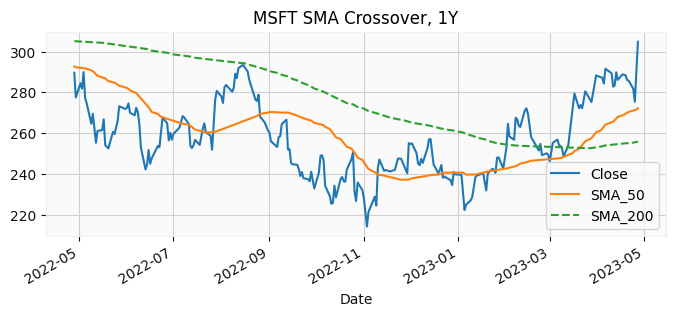

In [16]:
df = add_sma_crossover(hist)
plot_sma_crossover(df, ticker_symbol, "1Y")

## Calculated by taking the averae price over a specified time period, with the most recent data points weghted more heavily in the calculation.
## SMA refers to Simple Moving Average.

## When the short-term MA crosses above the long-term MA, it could be a bullish signal and a potential buy opportunity.
## When the short-term MA crosses below the long-term MA, it could be a bearish signal and a potential sell opportunity.

## 5 Volatility indicators


See [Volatility](https://www.investopedia.com/terms/v/volatility.asp) for more information.

### 5.1 Bollinger Bands

See [Bollinger Band](https://www.investopedia.com/terms/b/bollingerbands.asp) for more information.

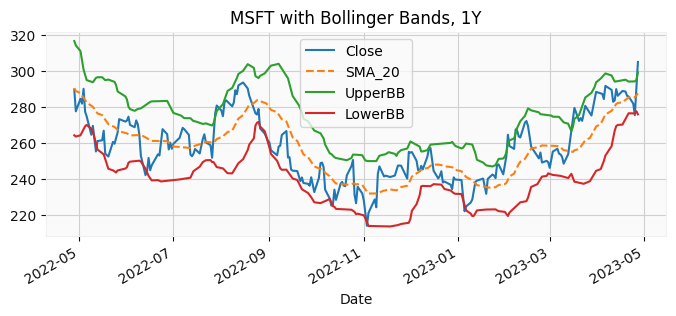

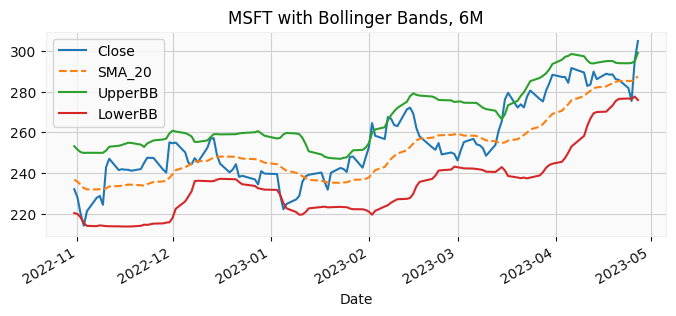

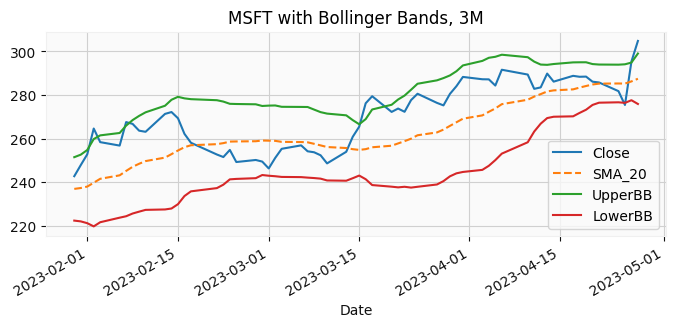

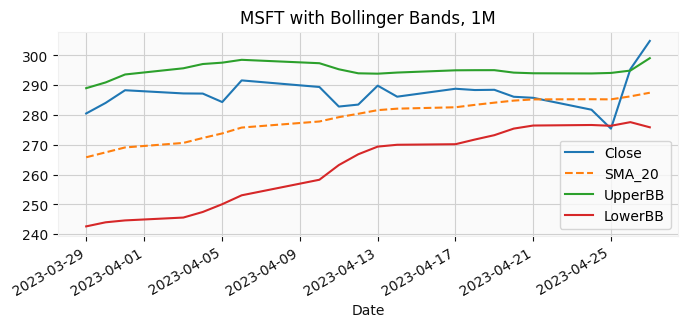

In [17]:
df = add_bollinger_bands(hist)
for rng in ["1Y", "6M", "3M", "1M"]:
    plot_bollinger(df, ticker_symbol, rng)

## Consists of:
## 1. a moving average line in the center
## 2. two price channels (bands) plotted at a standard deviation.

## Dynamically adjusts their width based on market volatility:
## becoming narrower during periods of low volatility;
## and wider during periods of high volatility.

## When the price moves towards the upper band, it indicates that the asset is overbought (too high too fast).
## When the price moves towards the lower band, it indicates that the asset is oversold (too low too fast).

## Often in conjunction with other indicators:
## 1. moves above the upper band and confirm with a momentum indicator (e.g., RSI) to ensure not falst breakout.
## 2. moves below the lower band and confirm with a volumne indicator (e.g. OBV) to ensure selling pressure has a sufficient support on potential reversal.

## False breakout - when the price moves beyond a certain level, but quickly retreats back to its original price level.
## Standard deviation - 

## SMA_20 refers to 20-period simple moving average.

## 6 Momentum indicators

See [Momentum indicators](https://www.investopedia.com/investing/momentum-and-relative-strength-index/) for more information.

<!-- technical analysis tools that measure the rate of change in price movements of an asset over a given period, providing insights into the strength and direction of the trend. -->

### 6.1 Stochastic Oscillator

See [Stochastic Oscillator](https://www.investopedia.com/terms/s/stochasticoscillator.asp) for more information.

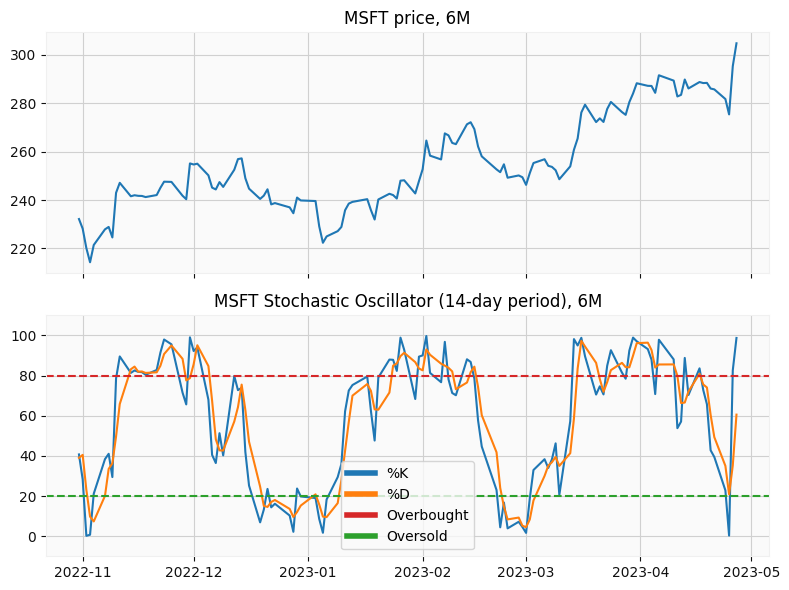

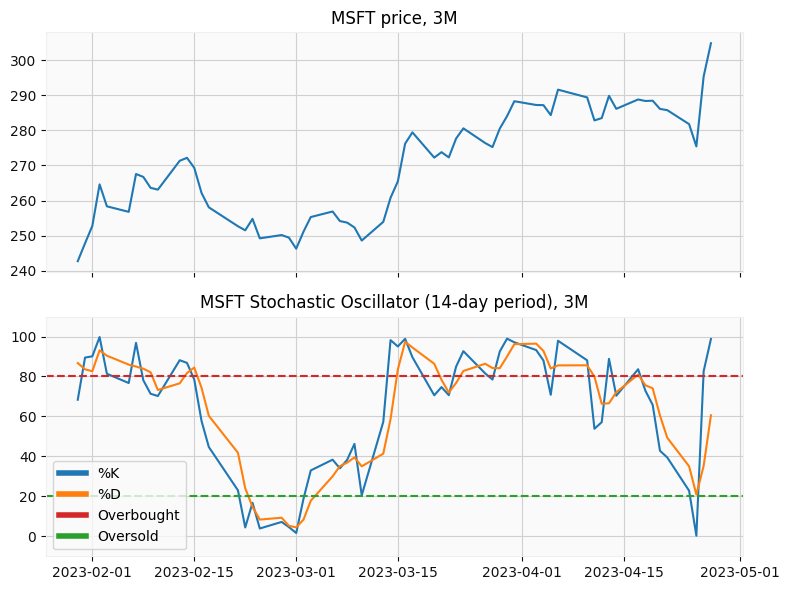

In [18]:
df = add_stochastic_oscillator(hist)
for rng in ["6M", "3M"]:
    plot_stochastic_oscillator(df, ticker_symbol, rng)

## %K is the main line and represents the current price relative to the highest and lowest prices over a specific time period.
## %D is a moving average of %K and is used to smooth out the oscillator's fluctuations, making it easier to identify trends.

## %K is typically calculated using a 14-period time frame, while %D is calculated using a 3-period moving average of %K.

## Overbought refers to the indicator level of above 80 (too high too quickly).
## Oversold refers to the indicator level of below 20 (too low too quickly).

## Seems to be using SMA (doubted).

### 6.2 Relative Strength Index (RSI)

See [Relative Strength Index (RSI)](https://www.investopedia.com/terms/r/rsi.asp) for more information.

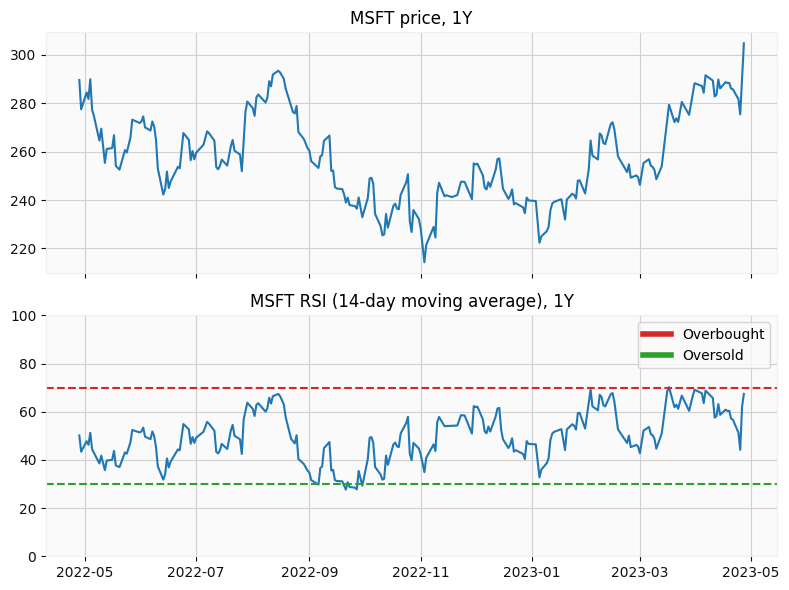

In [19]:
df = add_rsi(hist)
plot_rsi(df, ticker_symbol, "1Y")

## Measures the strength of price movements and identify potential trend reversal.

## Seems to be using SMA (doubted).

### 6.3 Moving Average Convergence Divergence (MACD)

See:

- [Moving Average Convergence Divergence (MACD)](https://www.investopedia.com/terms/m/macd.asp)
- [What Is the Moving Average Convergence Divergence, and How Is It Calculated?](https://www.investopedia.com/ask/answers/122414/what-moving-average-convergence-divergence-macd-formula-and-how-it-calculated.asp)
- [MACD: A Primer](https://www.investopedia.com/trading/macd/)


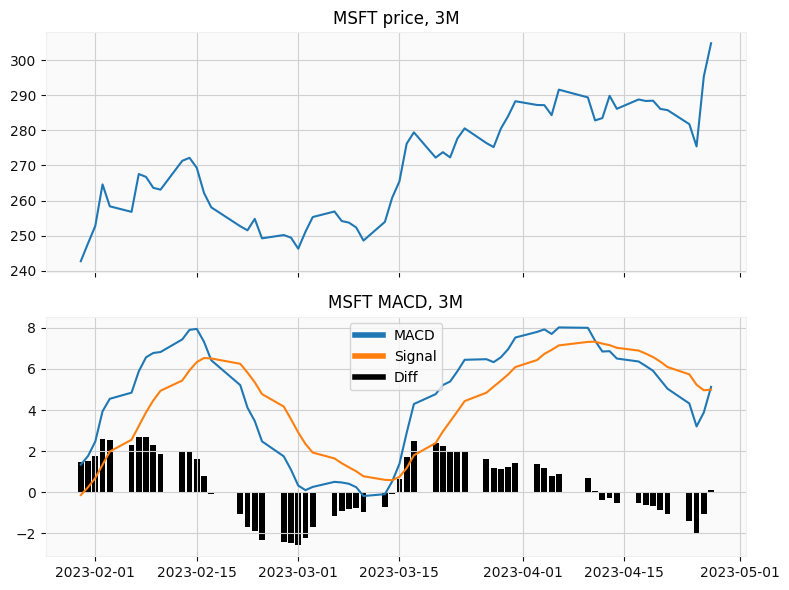

In [20]:
df = add_macd(hist)
plot_macd(df, ticker_symbol, "3M")

## MACD line is calculated by (EMA_26 - EMA_12).
## Signal line is calculated by plotting a EMA_9 line.

## When the MACD line crosses above the signal line, it could be a bullish signal and a potential buy opportunity.
## When the MACD line crosses below the signal line, it could be a bearish signal and a potential sell opportunity.

## The comparison of short-term momentum (MACD line) with long-term momentum (signal line).
## The calculation of MACD line respond more quickly to short-term price changes.

## MACD line is generally more volatile, while signal line is smoother.

### 6.4 On-Balance Volume (OBV)

See [On-Balance Volume (OBV) Definition](https://www.investopedia.com/terms/o/onbalancevolume.asp).

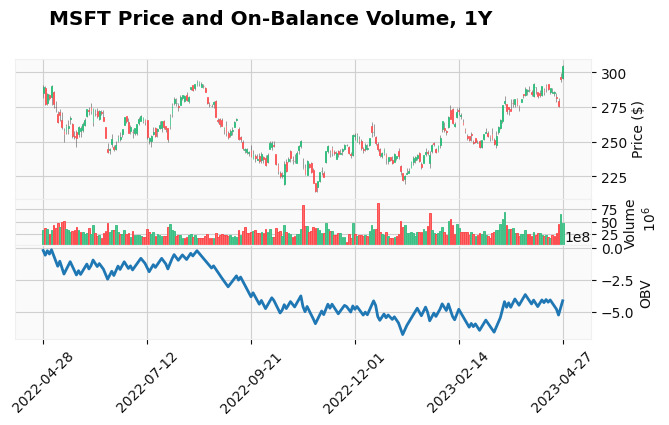

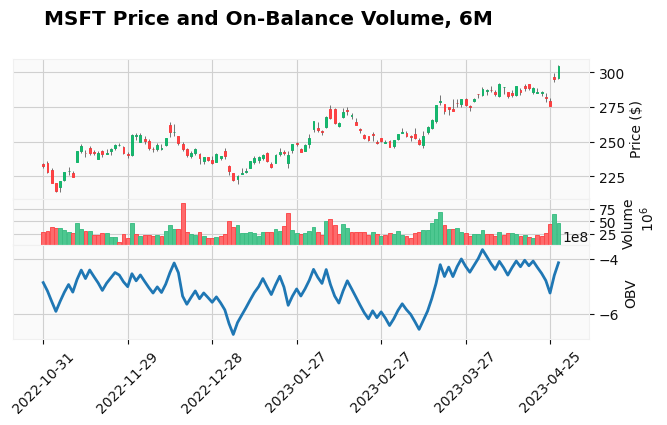

In [21]:
df = add_obv(hist)
for rng in ["1Y", "6M"]:
    plot_obv(df, ticker_symbol, rng)

## Measures the buying and selling pressures by tracking the volume flow.
## Changes in volume precede price movements, and can help identify potential price trends and reversals.

## Calculated by changing the volume of a security to a cumulative total:
## 1. Adding when the closing price is higher than the previous day;
## 2. Subtracting when the closing price is lower than the previous day.

## If the OBV line is trending higher along with rising prices, it indicates increasing buying pressure with confirmed uptrend.
## If the OBV line is trending lower along with falling prices, it indicates increasing selling pressure with confirmed downtrend.

## Relationship and Differences between 4, 5, and 6 (from ChatGPT)

They are all methods used in technical analysis for predicting future price movements of a financial asset, such as a stock.

Trend trading is based on identifying the direction of the asset's price trend and making trades based on that direction.

Volatility indicators measure the degree of price fluctuation or volatility of an asset, and are used to identify potential changes in the direction of the trend or potential market reversals.

Momentum indicators measure the rate of change of an asset's price, and are used to identify the strength and persistence of a trend.

While they are distinct methods, they are often used in combination with one another. For example, a trend trader may use volatility indicators to confirm potential trend changes, or a momentum trader may use trend analysis to identify potential entry and exit points.